In [4]:
from google.colab import files
uploaded = files.upload()

Saving yulu.csv to yulu.csv


In [317]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import scipy.stats as spy

In [322]:
df = pd.read_csv("yulu.csv")

## Analysing the basic metrics

In [265]:
df.head()

datetime  season  holiday  workingday  weather  temp   atemp  \
0  2011-01-01 00:00:00       1        0           0        1  9.84  14.395   
1  2011-01-01 01:00:00       1        0           0        1  9.02  13.635   
2  2011-01-01 02:00:00       1        0           0        1  9.02  13.635   
3  2011-01-01 03:00:00       1        0           0        1  9.84  14.395   
4  2011-01-01 04:00:00       1        0           0        1  9.84  14.395   

   humidity  windspeed  casual  registered  count  
0        81        0.0       3          13     16  
1        80        0.0       8          32     40  
2        80        0.0       5          27     32  
3        75        0.0       3          10     13  
4        75        0.0       0           1      1

In [150]:
df.shape

(10886, 12)

In [151]:
df.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')

## Time period for the data

In [267]:
df['datetime'] = pd.to_datetime(df['datetime'])

In [270]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 1020.7 KB


In [271]:
df["datetime"] #finding the time period for which the data is given

0       2011-01-01 00:00:00
1       2011-01-01 01:00:00
2       2011-01-01 02:00:00
3       2011-01-01 03:00:00
4       2011-01-01 04:00:00
                ...        
10881   2012-12-19 19:00:00
10882   2012-12-19 20:00:00
10883   2012-12-19 21:00:00
10884   2012-12-19 22:00:00
10885   2012-12-19 23:00:00
Name: datetime, Length: 10886, dtype: datetime64[ns]

In [192]:
df["datetime"].min()

'2011-01-01 00:00:00'

In [193]:
df["datetime"].max()

'2012-12-19 23:00:00'

In [268]:
df['datetime'].max() - df['datetime'].min()

Timedelta('718 days 23:00:00')

* The data is given from Timestamp('2011-01-01 00:00:00') to Timestamp('2012-12-19 23:00:00').
* The total time period for which the data is given is '718 days 23:00:00'.

## Checking for Missing Values

In [196]:
df.isna().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [269]:
df.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

* The dataset does not contain any missing values.

## Duplicate Detection

In [198]:
df.duplicated().sum()

0

* There are no duplicate entries in the dataset

In [199]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [200]:
df.describe()

season       holiday    workingday       weather         temp  \
count  10886.000000  10886.000000  10886.000000  10886.000000  10886.00000   
mean       2.506614      0.028569      0.680875      1.418427     20.23086   
std        1.116174      0.166599      0.466159      0.633839      7.79159   
min        1.000000      0.000000      0.000000      1.000000      0.82000   
25%        2.000000      0.000000      0.000000      1.000000     13.94000   
50%        3.000000      0.000000      1.000000      1.000000     20.50000   
75%        4.000000      0.000000      1.000000      2.000000     26.24000   
max        4.000000      1.000000      1.000000      4.000000     41.00000   

              atemp      humidity     windspeed        casual    registered  \
count  10886.000000  10886.000000  10886.000000  10886.000000  10886.000000   
mean      23.655084     61.886460     12.799395     36.021955    155.552177   
std        8.474601     19.245033      8.164537     49.960477    151.039033   
min        0.760000      0.000000      0.000000      0.000000      0.000000   
25%       16.665000     47.000000      7.001500      4.000000     36.000000   
50%       24.240000     62.000000     12.998000     17.000000    118.000000   
75%       31.060000     77.000000     16.997900     49.000000    222.000000   
max       45.455000    100.000000     56.996900    367.000000    886.000000   

              count  
count  10886.000000  
mean     191.574132  
std      181.144454  
min        1.000000  
25%       42.000000  
50%      145.000000  
75%      284.000000  
max      977.000000

In [201]:
df.describe(include="object")

datetime
count                 10886
unique                10886
top     2011-01-01 00:00:00
freq                      1

## Non-Graphical Analysis(Counting Values and Unique attributes)

In [202]:
df.nunique()

datetime      10886
season            4
holiday           2
workingday        2
weather           4
temp             49
atemp            60
humidity         89
windspeed        28
casual          309
registered      731
count           822
dtype: int64

In [203]:
for i in df.columns:
  print('The count of unique values in',i,'are')
  print(df[i].nunique())
  print('-'*70)

The count of unique values in datetime are
10886
----------------------------------------------------------------------
The count of unique values in season are
4
----------------------------------------------------------------------
The count of unique values in holiday are
2
----------------------------------------------------------------------
The count of unique values in workingday are
2
----------------------------------------------------------------------
The count of unique values in weather are
4
----------------------------------------------------------------------
The count of unique values in temp are
49
----------------------------------------------------------------------
The count of unique values in atemp are
60
----------------------------------------------------------------------
The count of unique values in humidity are
89
----------------------------------------------------------------------
The count of unique values in windspeed are
28
---------------------------

In [204]:
for i in df.columns:
  print('The Unique Values in',i,'are')
  print(df[i].value_counts())
  print('-'*70)

The Unique Values in datetime are
2011-01-01 00:00:00    1
2012-05-01 21:00:00    1
2012-05-01 13:00:00    1
2012-05-01 14:00:00    1
2012-05-01 15:00:00    1
                      ..
2011-09-02 04:00:00    1
2011-09-02 05:00:00    1
2011-09-02 06:00:00    1
2011-09-02 07:00:00    1
2012-12-19 23:00:00    1
Name: datetime, Length: 10886, dtype: int64
----------------------------------------------------------------------
The Unique Values in season are
4    2734
2    2733
3    2733
1    2686
Name: season, dtype: int64
----------------------------------------------------------------------
The Unique Values in holiday are
0    10575
1      311
Name: holiday, dtype: int64
----------------------------------------------------------------------
The Unique Values in workingday are
1    7412
0    3474
Name: workingday, dtype: int64
----------------------------------------------------------------------
The Unique Values in weather are
1    7192
2    2834
3     859
4       1
Name: weather, dtype:

In [205]:
df['datetime'] = pd.to_datetime(df['datetime'])

cat_cols= ['season', 'holiday', 'workingday', 'weather']
for col in cat_cols:
    df[col] = df[col].astype('object')

In [206]:
df

datetime season holiday workingday weather   temp   atemp  \
0     2011-01-01 00:00:00      1       0          0       1   9.84  14.395   
1     2011-01-01 01:00:00      1       0          0       1   9.02  13.635   
2     2011-01-01 02:00:00      1       0          0       1   9.02  13.635   
3     2011-01-01 03:00:00      1       0          0       1   9.84  14.395   
4     2011-01-01 04:00:00      1       0          0       1   9.84  14.395   
...                   ...    ...     ...        ...     ...    ...     ...   
10881 2012-12-19 19:00:00      4       0          1       1  15.58  19.695   
10882 2012-12-19 20:00:00      4       0          1       1  14.76  17.425   
10883 2012-12-19 21:00:00      4       0          1       1  13.94  15.910   
10884 2012-12-19 22:00:00      4       0          1       1  13.94  17.425   
10885 2012-12-19 23:00:00      4       0          1       1  13.12  16.665   

       humidity  windspeed  casual  registered  count  
0            81     0.0000       3          13     16  
1            80     0.0000       8          32     40  
2            80     0.0000       5          27     32  
3            75     0.0000       3          10     13  
4            75     0.0000       0           1      1  
...         ...        ...     ...         ...    ...  
10881        50    26.0027       7         329    336  
10882        57    15.0013      10         231    241  
10883        61    15.0013       4         164    168  
10884        61     6.0032      12         117    129  
10885        66     8.9981       4          84     88  

[10886 rows x 12 columns]

In [207]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  object        
 2   holiday     10886 non-null  object        
 3   workingday  10886 non-null  object        
 4   weather     10886 non-null  object        
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(4), object(4)
memory usage: 1020.7+ KB


## Outlier Detections

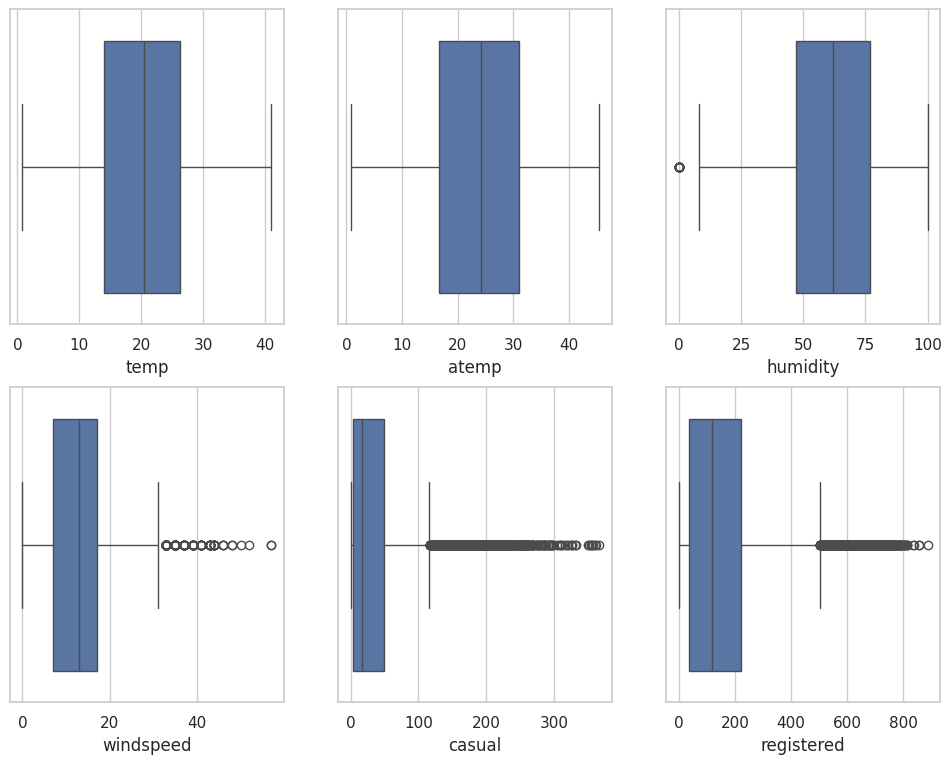

In [208]:
fig, axis = plt.subplots(nrows=2, ncols=3, figsize=(12, 9))
num_cols = ['temp', 'atemp', 'humidity', 'windspeed', 'casual', 'registered']
index = 0
for row in range(2):
    for col in range(3):
      sns.set(style="dark")
      sns.boxplot(x=df[num_cols[index]], ax=axis[row, col])
      index += 1

plt.show()
sns.set(style="dark")

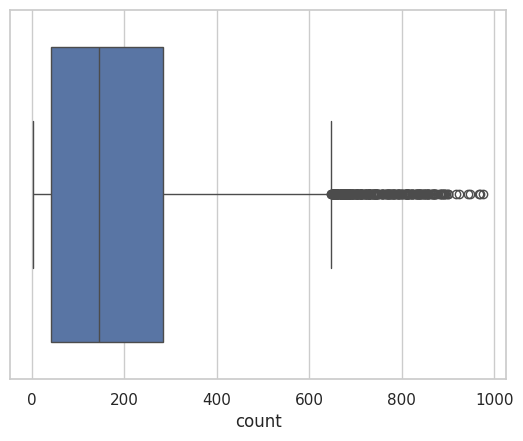

In [209]:
sns.set(style="whitegrid")
sns.boxplot(x=df["count"])
plt.show()

Observations
* There is no outlier in the temp and atemp column.
* There are few outliers present in the humidity column.
* There are many outliers present in each of the columns : windspeed, casual, registered, count.

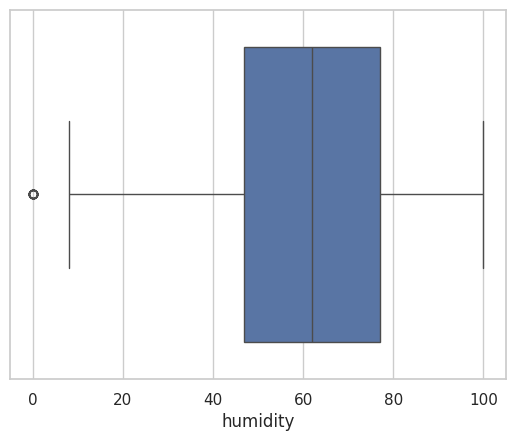

Q1= 47.0
Q3= 77.0
IQR= 30.0
Upper band= 122.0
Lower band= 2.0
Median 62.0
Total outliers: 22


In [210]:
sns.set(style="whitegrid")
sns.boxplot(x=df["humidity"]) #for humidity
plt.show()
q1 = np.percentile(df["humidity"],25)
q3 = np.percentile(df["humidity"],75)
IQR = q3-q1
Upper_band = q3+1.5*(IQR)
Lower_band = q1-1.5*(IQR)
Median = df["humidity"].median()
print("Q1=", q1)
print("Q3=", q3)
print("IQR=", IQR)
print("Upper band=", Upper_band)
print("Lower band=", Lower_band)
print("Median", df["humidity"].median())
print("Total outliers:",len(df.loc[df["humidity"] < Lower_band,'humidity'])) # All values below the lower band i.e > 2 are outliers.

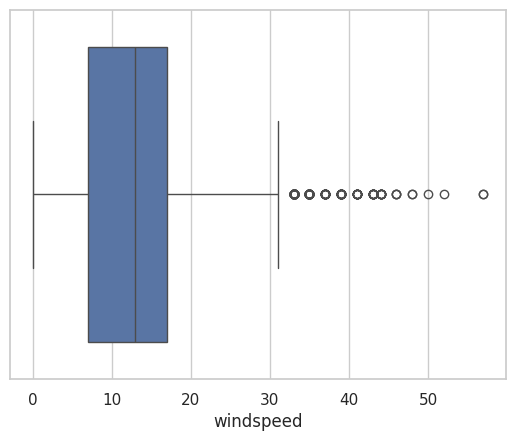

Q1= 7.0015
Q3= 16.9979
IQR= 9.996400000000001
Upper band= 31.992500000000003
Lower band= -7.993100000000002
Median 12.998
Total outliers: 227


In [211]:
sns.set(style="whitegrid")
sns.boxplot(x=df["windspeed"]) # for windspeed
plt.show()
q1 = np.percentile(df["windspeed"],25)
q3 = np.percentile(df["windspeed"],75)
IQR = q3-q1
Upper_band = q3+1.5*(IQR)
Lower_band = q1-1.5*(IQR)
Median = df["windspeed"].median()
print("Q1=", q1)
print("Q3=", q3)
print("IQR=", IQR)
print("Upper band=", Upper_band)
print("Lower band=", Lower_band)
print("Median", df["windspeed"].median())
print("Total outliers:",len(df.loc[df["windspeed"] > Upper_band,'windspeed'])) # All values below the upper band i.e > 31.9 are outliers.

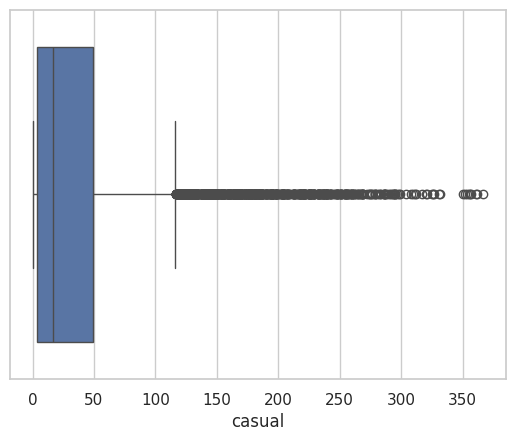

Q1= 4.0
Q3= 49.0
IQR= 45.0
Upper band= 116.5
Lower band= -63.5
Median 17.0
Total outliers: 749


In [212]:
sns.set(style="whitegrid")
sns.boxplot(x=df["casual"]) #for casual column
plt.show()
q1 = np.percentile(df["casual"],25)
q3 = np.percentile(df["casual"],75)
IQR = q3-q1
Upper_band = q3+1.5*(IQR)
Lower_band = q1-1.5*(IQR)
Median = df["casual"].median()
print("Q1=", q1)
print("Q3=", q3)
print("IQR=", IQR)
print("Upper band=", Upper_band)
print("Lower band=", Lower_band)
print("Median", df["casual"].median())
print("Total outliers:",len(df.loc[df["casual"] > Upper_band,'casual'])) # All values above the upper band i.e > 116.5 are outliers.

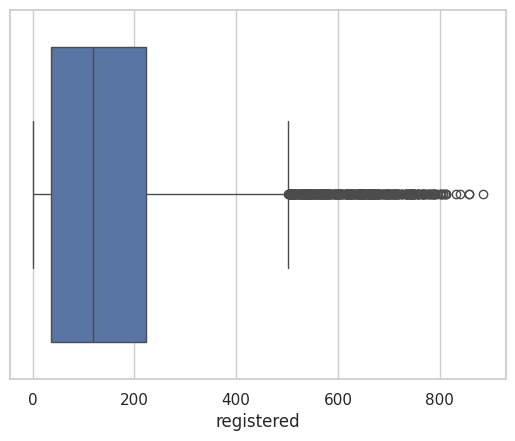

Q1= 36.0
Q3= 222.0
IQR= 186.0
Upper band= 501.0
Lower band= -243.0
Median 118.0
Total outliers: 423


In [213]:
sns.set(style="whitegrid")
sns.boxplot(x=df["registered"]) #for registered column
plt.show()
q1 = np.percentile(df["registered"],25)
q3 = np.percentile(df["registered"],75)
IQR = q3-q1
Upper_band = q3+1.5*(IQR)
Lower_band = q1-1.5*(IQR)
Median = df["registered"].median()
print("Q1=", q1)
print("Q3=", q3)
print("IQR=", IQR)
print("Upper band=", Upper_band)
print("Lower band=", Lower_band)
print("Median", df["registered"].median())
print("Total outliers:",len(df.loc[df["registered"] > Upper_band,'registered'])) # All values above the upper band i.e > 501 are outliers.

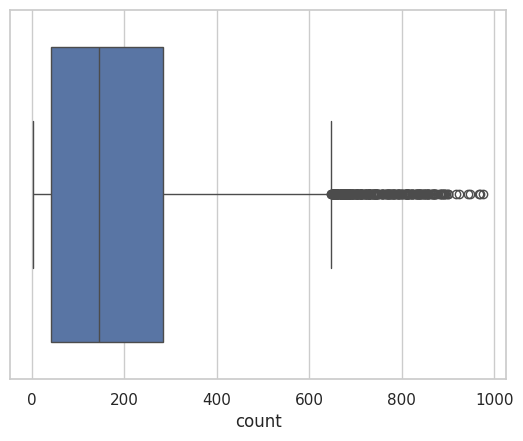

Q1= 42.0
Q3= 284.0
IQR= 242.0
Upper band= 647.0
Lower band= -321.0
Median 145.0
Total outliers: 300


In [214]:
sns.set(style="whitegrid")
sns.boxplot(x=df["count"]) #for count column
plt.show()
q1 = np.percentile(df["count"],25)
q3 = np.percentile(df["count"],75)
IQR = q3-q1
Upper_band = q3+1.5*(IQR)
Lower_band = q1-1.5*(IQR)
Median = df["count"].median()
print("Q1=", q1)
print("Q3=", q3)
print("IQR=", IQR)
print("Upper band=", Upper_band)
print("Lower band=", Lower_band)
print("Median", df["count"].median())
print("Total outliers:",len(df.loc[df["count"] > Upper_band,'count'])) # All values above the upper band i.e > 647.0 are outliers.

**Observations**
* There is no outlier in the temp and atemp column.
* There are few outliers present in the humidity column.
* There are many outliers present in each of the columns : windspeed, casual, registered, count.

**Outliers**
* 0.2% values in the humidity column are outliers.
* 2% values in the windspeed column are outliers.
* 6.8% values in the casual column are outliers.
* 3.8% values in the registered column are outliers.
* 2.7% values in the count column are outliers.


##Uni-variate Analysis

### Distribution of data for Numerical variables ('temp', 'atemp', 'humidity', 'windspeed', 'casual', 'registered', count)

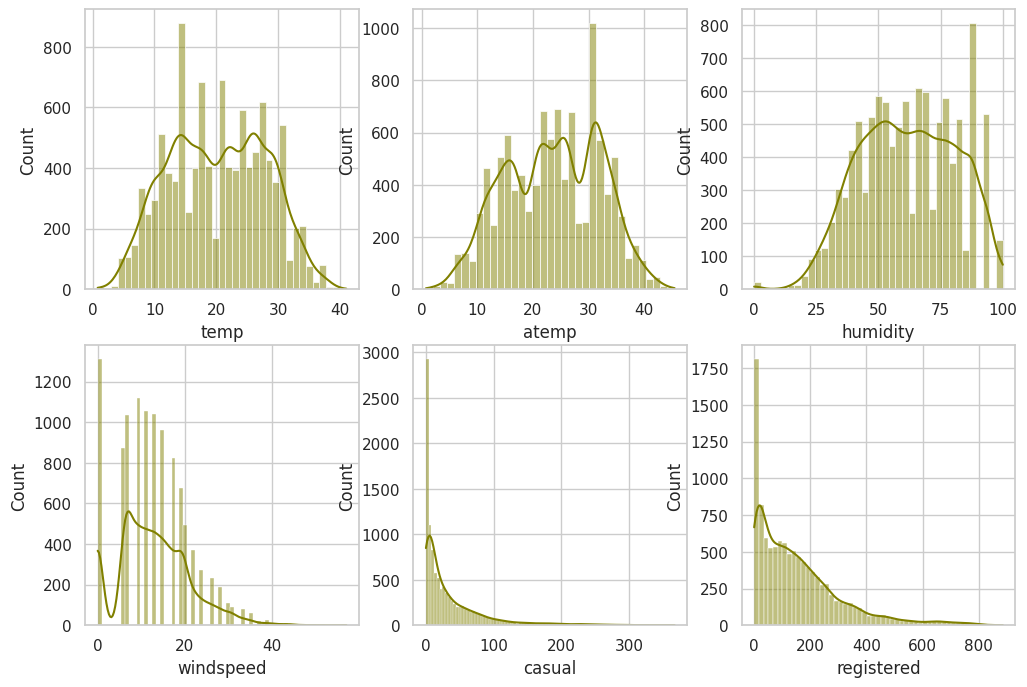

In [215]:
# understanding the distribution for numerical variables
num_cols = ['temp', 'atemp', 'humidity', 'windspeed', 'casual', 'registered']
fig, axis = plt.subplots(nrows=2, ncols=3, figsize=(12, 8))
index = 0
for row in range(2):
    for col in range(3):
      sns.set(style="darkgrid")
      sns.histplot(df[num_cols[index]], ax=axis[row, col], kde=True,color="olive", label="Sepal Length")
      index += 1
plt.show()

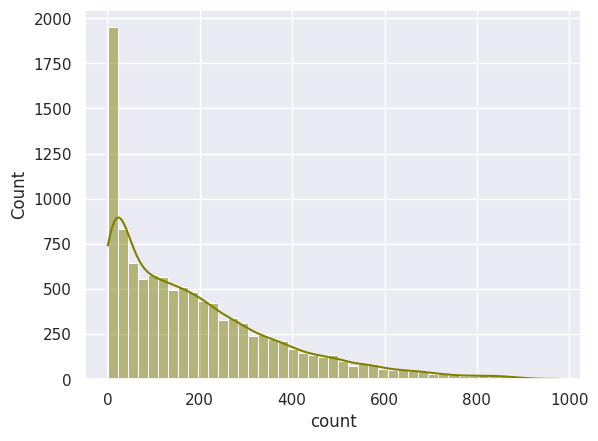

In [216]:
sns.histplot(x=df["count"],kde = True,color="olive", label="Sepal Length")
plt.show()

**Observations**
* The distribution of casual, registered, and total counts bears resemblance to a Log Normal Distribution.
* Temperature (temp), apparent temperature (atemp), and humidity exhibit patterns indicative of a Normal Distribution.
* Windspeed conforms to a Binomial Distribution.

###Distribution of data for Categorical Columns ('season', 'holiday', 'weather', 'workingday')

In [217]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  object        
 2   holiday     10886 non-null  object        
 3   workingday  10886 non-null  object        
 4   weather     10886 non-null  object        
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(4), object(4)
memory usage: 1020.7+ KB


<ipython-input-218-a627533d12d7>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='viridis')
<ipython-input-218-a627533d12d7>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='viridis')
<ipython-input-218-a627533d12d7>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='viridis')
<ipython-input-218-a627533d12d7>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=

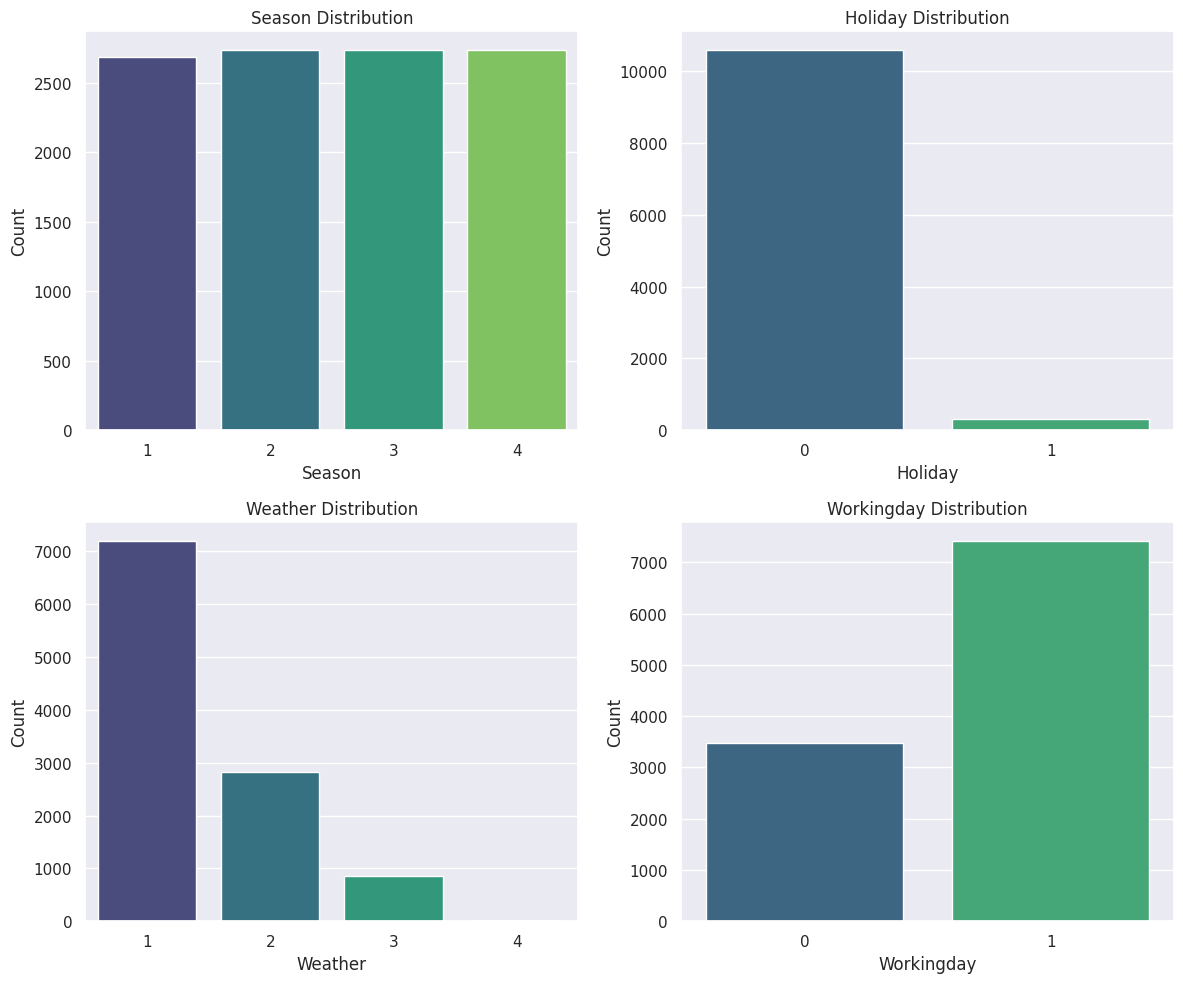

In [218]:
plt.figure(figsize=(12, 10))
columns1 = ['season', 'holiday', 'weather', 'workingday'] # countplot of each categorical column (Dtype ="object")

for i, col in enumerate(columns1, 1):
    plt.subplot(2, 2, i)
    sns.countplot(data=df, x=col, palette='viridis')
    plt.title(f"{col.capitalize()} Distribution")
    plt.xlabel(col.capitalize())
    plt.ylabel("Count")

plt.tight_layout()
plt.show()

<Axes: ylabel='season'>

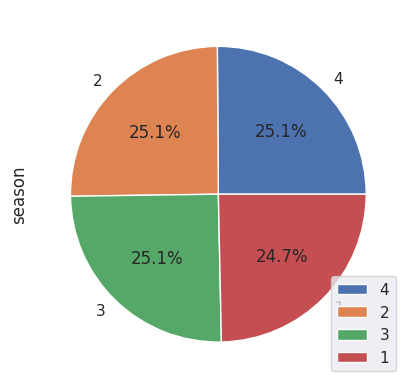

In [219]:
df_season = np.round(df['season'].value_counts(normalize = True) * 100, 2).to_frame()
df_season.plot.pie(y='season', autopct='%1.1f%%')

Observations
* The data appears typical and as expected.
* There is an equal distribution of days across each season.
* The number of working days surpasses that of non-working days.
* Predominantly, the weather is characterized by clear conditions.




<ipython-input-220-827bf0b94cc5>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=col, y='count', ax=axes[i//2, i%2], palette='viridis')
<ipython-input-220-827bf0b94cc5>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=col, y='count', ax=axes[i//2, i%2], palette='viridis')
<ipython-input-220-827bf0b94cc5>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=col, y='count', ax=axes[i//2, i%2], palette='viridis')
<ipython-input-220-827bf0b94cc5>:6: FutureWarning: 

Passing `palette` without assigning `hue` is depre

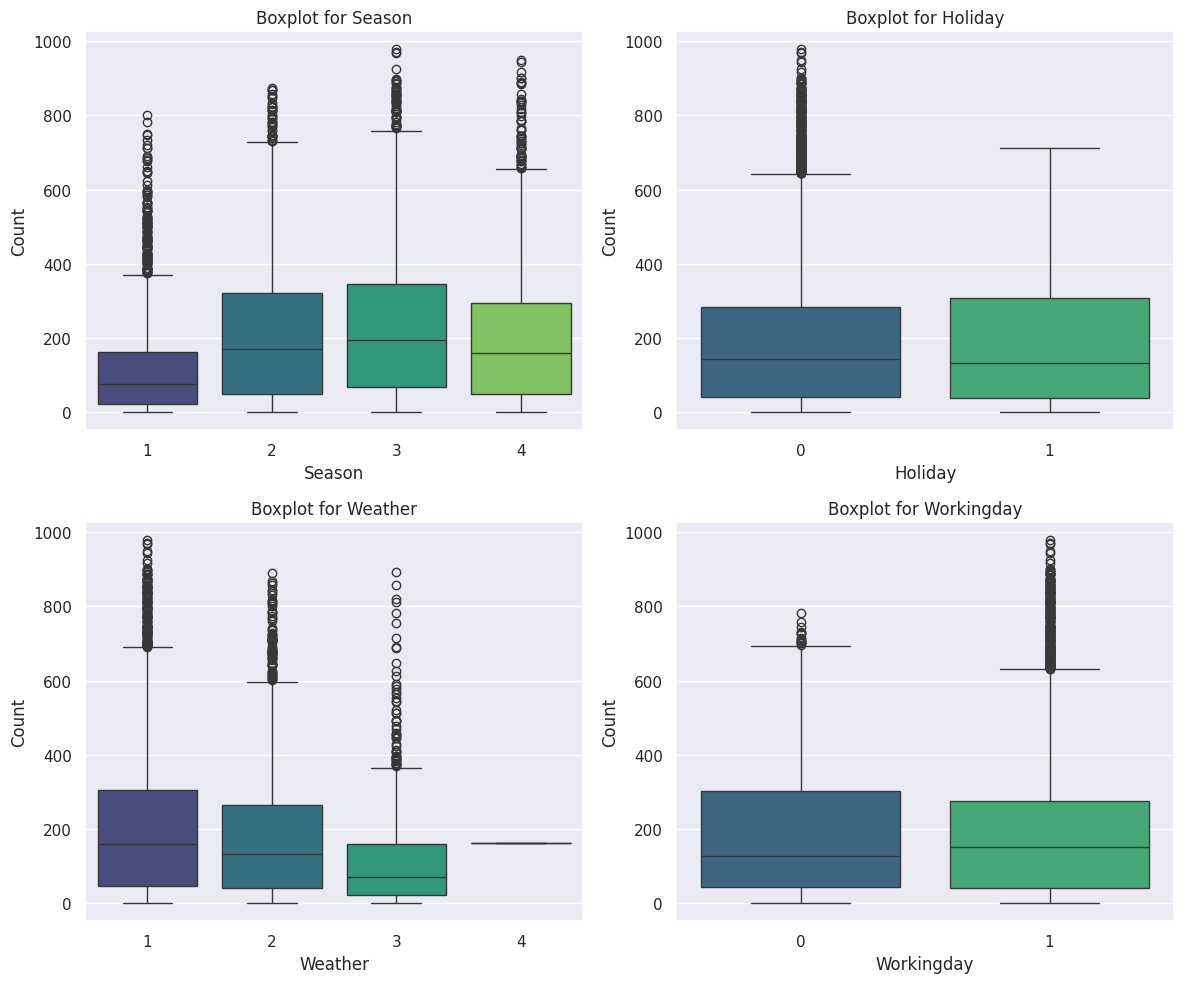

In [220]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))
cat_cols = ['season', 'holiday', 'weather', 'workingday']  # categorical columns

for i, col in enumerate(cat_cols):
    sns.set(style="whitegrid")
    sns.boxplot(data=df, x=col, y='count', ax=axes[i//2, i%2], palette='viridis')
    axes[i//2, i%2].set_title(f'Boxplot for {col.capitalize()}')
    axes[i//2, i%2].set_xlabel(col.capitalize())
    axes[i//2, i%2].set_ylabel('Count')

plt.tight_layout()
plt.show()

Observations
* During the summer and fall seasons, there is a higher rental frequency compared to other seasons.
* Holidays consistently result in increased bike rentals.
* On weekends or holidays (as indicated by the "workingday" variable), there is a slight uptick in bike rentals.
* Conversely, instances of rain, thunderstorms, snow, or fog are associated with a decrease in bike rentals.

## Bi-variate analysis

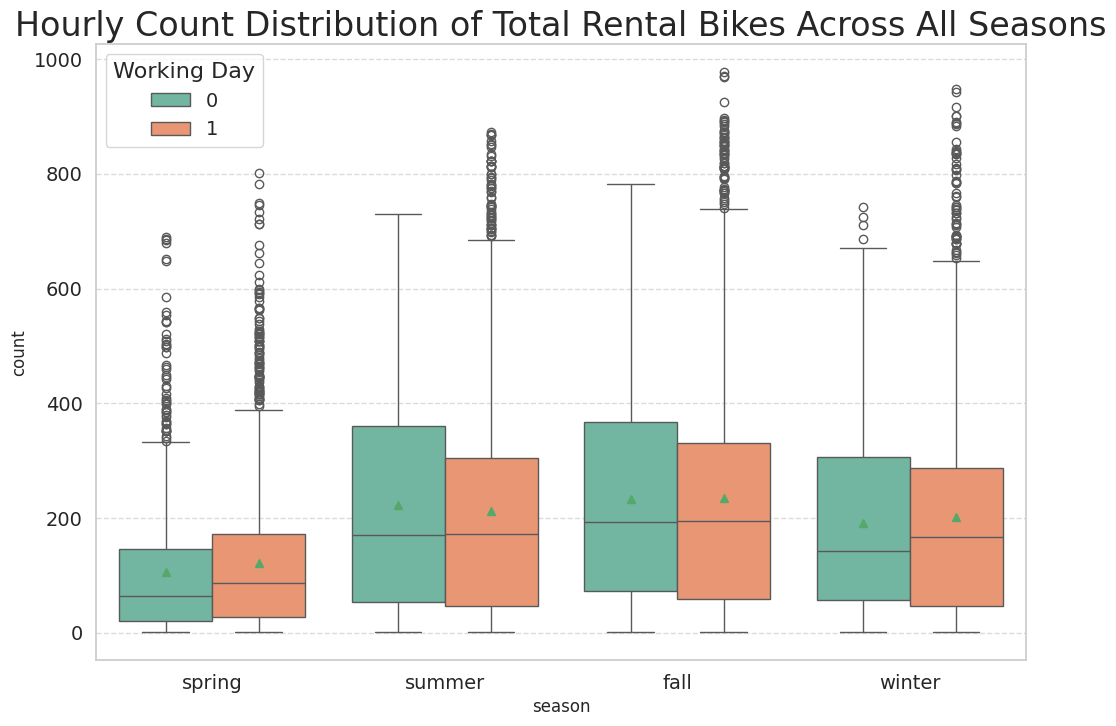

In [278]:
def season_category(x):
    if x == 1:
        return 'spring'
    elif x == 2:
        return 'summer'
    elif x == 3:
        return 'fall'
    else:
        return 'winter'
df['season'] = df['season'].apply(season_category)

sns.set(style="whitegrid") # working day vs season
plt.figure(figsize=(12, 8))
plt.title('Hourly Count Distribution of Total Rental Bikes Across All Seasons',
          fontsize=24)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
sns.boxplot(data=df, x='season', y='count', hue='workingday', showmeans=True, palette='Set2')
plt.legend(title='Working Day', title_fontsize='16', fontsize='14')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

* The number of bikes rented per hour tends to peak during the fall season, with the summer and winter seasons following closely. In contrast, it generally remains lower during the spring season.


<Figure size 1200x800 with 0 Axes>

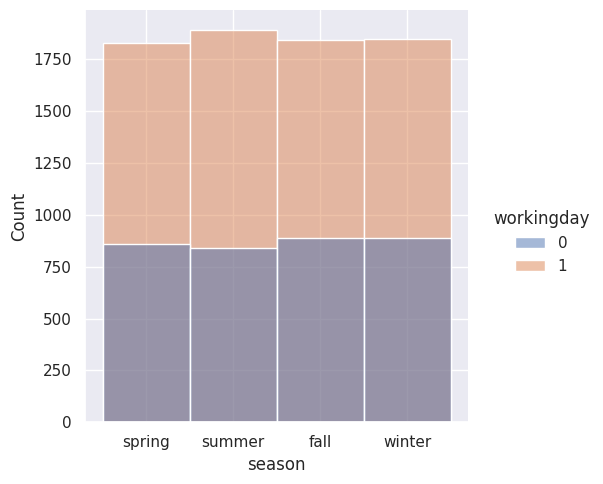

In [279]:
plt.figure(figsize=(12,8)) # workingday vs Season
sns.set(style='darkgrid')
sns.displot(x= 'season',data=df,hue='workingday')
plt.show()

In [223]:
df.groupby('season')["workingday"].value_counts()

season  workingday
1       1             1828
        0              858
2       1             1893
        0              840
3       1             1845
        0              888
4       1             1846
        0              888
Name: workingday, dtype: int64

* The hourly count of total rental bikes is higher in the fall season, followed by the summer and winter seasons. It is generally low in the spring season.
* The mean hourly count of the total rental bikes is statistically similar for both working and non- working days.

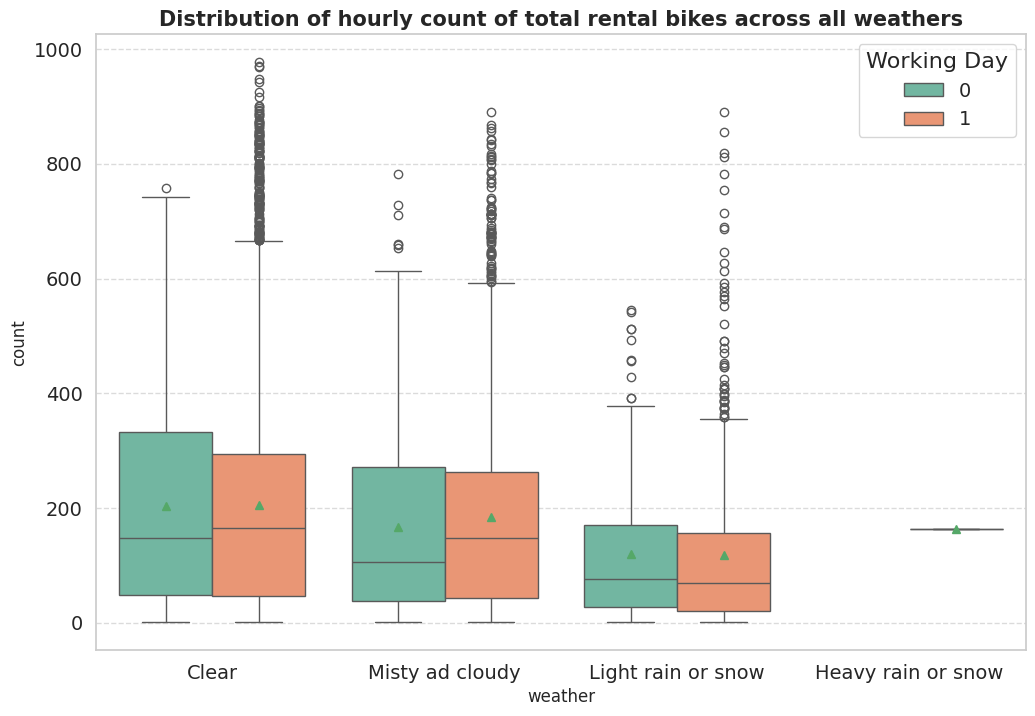

In [285]:
def weather_category(x):
    if x == 1:
        return 'Clear'
    elif x == 2:
        return 'Misty ad cloudy'
    elif x == 3:
        return 'Light rain or snow'
    else:
        return 'Heavy rain or snow'

df['weather'] = df['weather'].apply(weather_category)

sns.set(style="whitegrid") #weather vs working day
plt.figure(figsize=(12, 8))
plt.title('Distribution of hourly count of total rental bikes across all weathers',
          fontsize=15, fontweight='bold')

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
sns.boxplot(data = df, x = 'weather', y = 'count', hue ='workingday', showmeans=True, palette='Set2')
plt.legend(title='Working Day', title_fontsize='16', fontsize='14')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

* The number of bikes rented per hour is highest during clear and cloudy weather, with misty conditions and rainy weather trailing behind.
* There are limited records for extreme weather conditions.

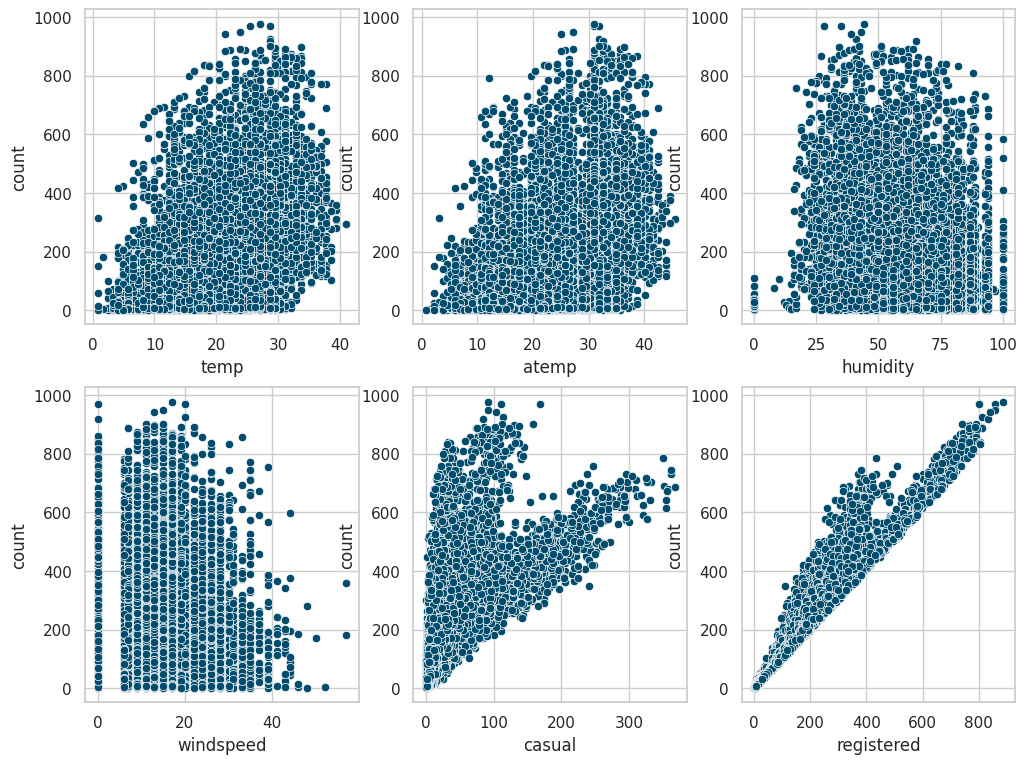

In [272]:
# plotting numerical variables againt count using scatterplot
fig, axis = plt.subplots(nrows=2, ncols=3, figsize=(12, 9))
index = 0
for row in range(2):
    for col in range(3):
        sns.scatterplot(data=df, x=num_cols[index], y='count', ax=axis[row, col],color="#004c6d")
        index += 1
plt.show()

Observations
* Bike rentals significantly drop when humidity levels fall below 20.
* Lower temperatures, specifically below 10, correspond to a decrease in the number of rented bikes.
* Elevated windspeeds exceeding 35 result in a reduced number of bike rentals.

##Establishing Relationship B/W Dependent and Independent Variables.

<Figure size 1500x1000 with 0 Axes>

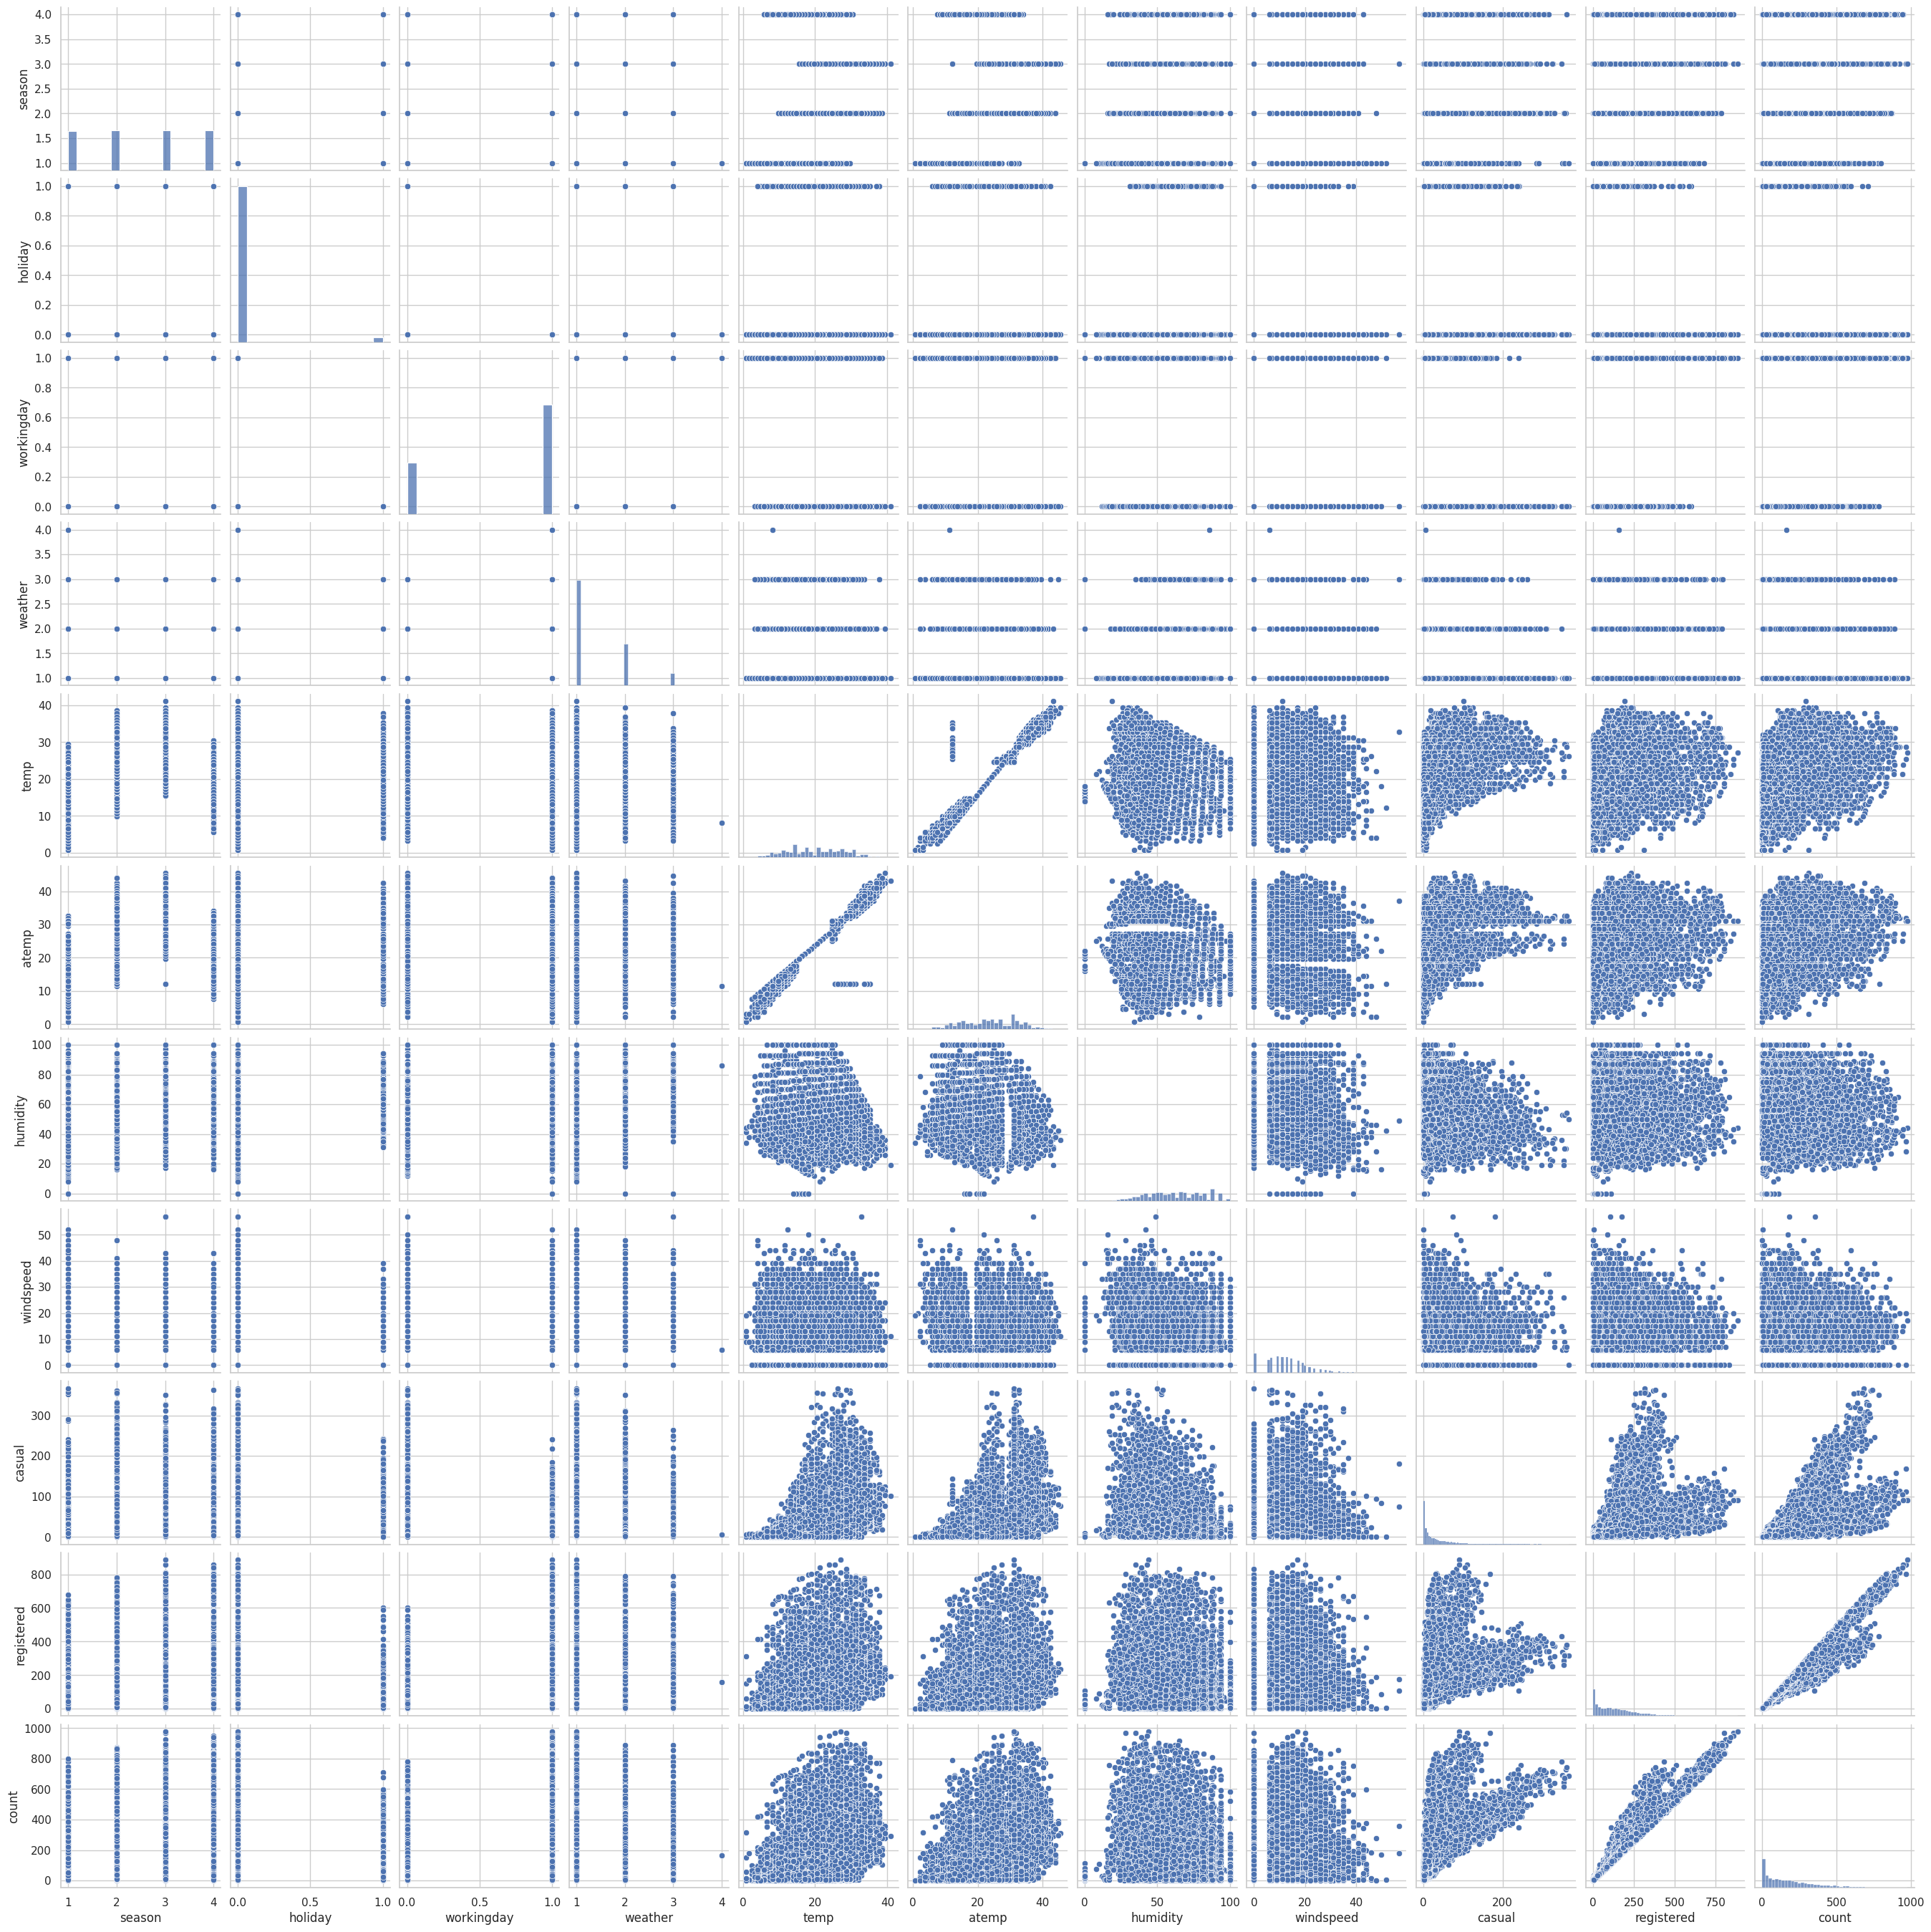

In [273]:
plt.figure(figsize=(15,10))
sns.pairplot(df)
plt.show()

<ipython-input-292-6445556cfce1>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()['count']
<ipython-input-292-6445556cfce1>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, xticklabels=1)


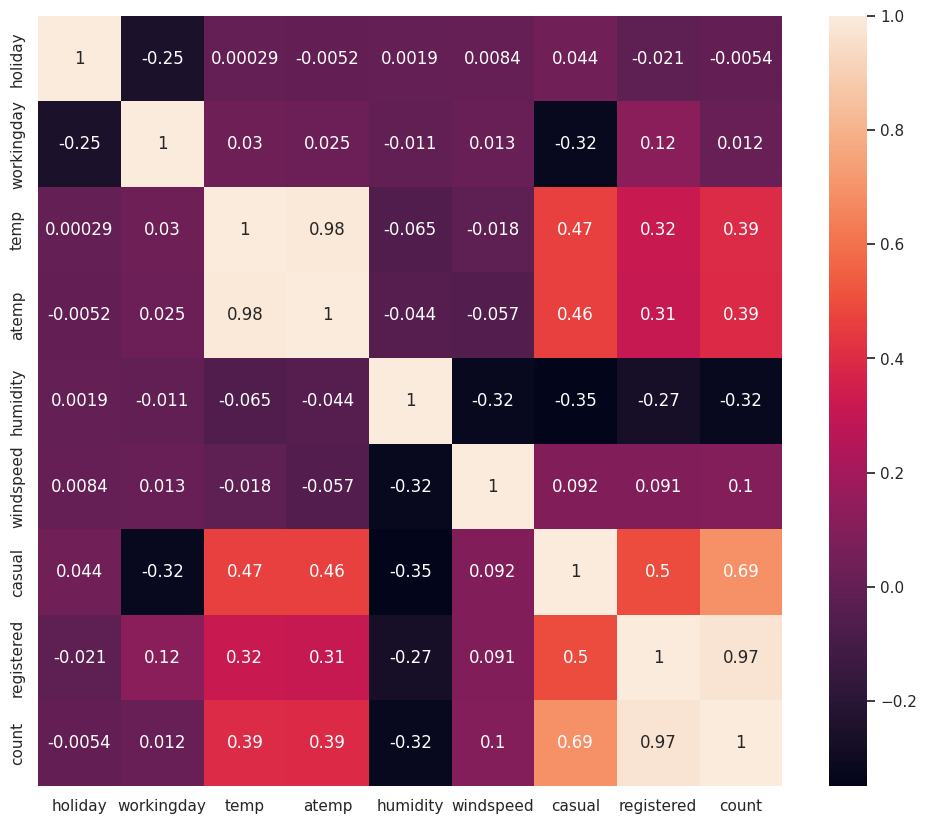

In [292]:
# understanding the correlation between count and numerical variables
plt.figure(figsize=(12,10))
df.corr()['count']
sns.heatmap(df.corr(), annot=True, xticklabels=1)
plt.show()

In [291]:
corr_data = df.corr()
corr_data

<ipython-input-291-f9b45ce29f9e>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_data = df.corr()


holiday  workingday      temp     atemp  humidity  windspeed  \
holiday     1.000000   -0.250491  0.000295 -0.005215  0.001929   0.008409   
workingday -0.250491    1.000000  0.029966  0.024660 -0.010880   0.013373   
temp        0.000295    0.029966  1.000000  0.984948 -0.064949  -0.017852   
atemp      -0.005215    0.024660  0.984948  1.000000 -0.043536  -0.057473   
humidity    0.001929   -0.010880 -0.064949 -0.043536  1.000000  -0.318607   
windspeed   0.008409    0.013373 -0.017852 -0.057473 -0.318607   1.000000   
casual      0.043799   -0.319111  0.467097  0.462067 -0.348187   0.092276   
registered -0.020956    0.119460  0.318571  0.314635 -0.265458   0.091052   
count      -0.005393    0.011594  0.394454  0.389784 -0.317371   0.101369   

              casual  registered     count  
holiday     0.043799   -0.020956 -0.005393  
workingday -0.319111    0.119460  0.011594  
temp        0.467097    0.318571  0.394454  
atemp       0.462067    0.314635  0.389784  
humidity   -0.348187   -0.265458 -0.317371  
windspeed   0.092276    0.091052  0.101369  
casual      1.000000    0.497250  0.690414  
registered  0.497250    1.000000  0.970948  
count       0.690414    0.970948  1.000000

Observations
* There is a strong correlation between the columns [atemp, temp] and [count, registered], indicating a very high level of association.

* For all other combinations of columns, the correlation is minimal or negligible, suggesting a lack of significant association between those variables.

* There are no columns exhibiting a high positive or negative correlation (0.7 - 0.9), emphasizing the absence of strong linear relationships between any pairs of columns in the dataset.

## Checking if there any significant difference between the no. of bike rides on Weekdays and Weekends

In [230]:
from scipy.stats import ttest_1samp,ttest_ind,ttest_rel

In [231]:
df.groupby(by = 'workingday')['count'].describe()

count        mean         std  min   25%    50%    75%    max
workingday                                                                
0           3474.0  188.506621  173.724015  1.0  44.0  128.0  304.0  783.0
1           7412.0  193.011873  184.513659  1.0  41.0  151.0  277.0  977.0

Null Hypothesis: Working day has no effect on the number of cycles being rented.

Alternate Hypothesis: Working day has effect on the number of cycles being rented.

Significance level (alpha): 0.05

We will use the 2-Sample T-Test to test this hypothesis

In [293]:
no_work = df[df['workingday']==0]['count'].values
work = df[df['workingday']==1]['count'].values

array([ 16,  40,  32, ..., 106,  89,  33])

Before conducting the two-sample T-Test we need to find if the given data groups have the same variance. If the ratio of the larger data groups to the small data group is less than 4:1 then we can consider that the given data groups have equal variance.

In [233]:
np.var(no_work), np.var(work)

(30171.346098942427, 34040.69710674686)

Here, the ratio is 34040.70 / 30171.35 which is less than 4:1

In [234]:
t_stat,p_val=ttest_ind(a=no_work, b=work, equal_var=True)
print(f"T-Statistic : {t_stat}")
print(f"P Value : {p_val}")
alpha = 0.05
if p_val < alpha:
  print("Reject the null Hypothesis(Ho)")
else:
    print("Accept null Hypothesis(Ho)")



T-Statistic : -1.2096277376026694
P Value : 0.22644804226361348
Accept null Hypothesis(Ho)


* P-value is greater than 0.05, As the P-value is greater than the predetermined level of significance (alpha), We don't have the sufficient evidence to say that working day has effect on the number of cycles being rented.
* The mean hourly count of the total rental bikes is statistically similar for both working and non- working days.

## Checking if the demand of bicycles on rent is the same for different Weather conditions

In [235]:
df.groupby(by = 'weather')['count'].describe()

count        mean         std    min    25%    50%    75%    max
weather                                                                   
1        7192.0  205.236791  187.959566    1.0   48.0  161.0  305.0  977.0
2        2834.0  178.955540  168.366413    1.0   41.0  134.0  264.0  890.0
3         859.0  118.846333  138.581297    1.0   23.0   71.0  161.0  891.0
4           1.0  164.000000         NaN  164.0  164.0  164.0  164.0  164.0

In [236]:
df_weather1 = df.loc[df['weather'] == 1]
df_weather2 = df.loc[df['weather'] == 2]
df_weather3 = df.loc[df['weather'] == 3]
df_weather4 = df.loc[df['weather'] == 4]
len(df_weather1), len(df_weather2), len(df_weather3), len(df_weather4)

(7192, 2834, 859, 1)

Null Hypothesis ( H0 ) - Mean of cycle rented per hour is same for weather 1, 2 and 3.
(ignoring weather 4 as there in only 1 data point)

Alternate Hypothesis ( HA ) -Mean of cycle rented per hour is not same for season 1,2,3 and 4 are different.

Significance level (alpha): 0.05

We will use One-way ANOVA to test this hypothesis

[]

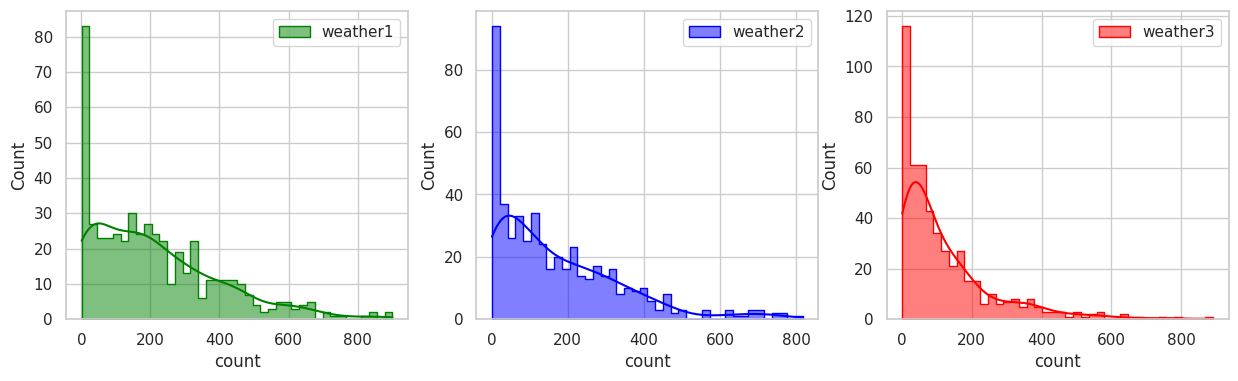

In [237]:
plt.figure(figsize = (15, 4))
plt.subplot(1, 3, 1)
sns.histplot(df_weather1.loc[:, 'count'].sample(500), bins = 40,
             element = 'step', color = 'green', kde = True, label = 'weather1')
plt.legend()
plt.subplot(1, 3, 2)
sns.histplot(df_weather2.loc[:, 'count'].sample(500), bins = 40,
             element = 'step', color = 'blue', kde = True, label = 'weather2')
plt.legend()
plt.subplot(1, 3, 3)
sns.histplot(df_weather3.loc[:, 'count'].sample(500), bins = 40,
             element = 'step', color = 'red', kde = True, label = 'weather3')
plt.legend()
plt.plot()

Normality check using QQ Plot. If the distribution is not normal, we will apply Shapiro-Wilk test for normality.

[]

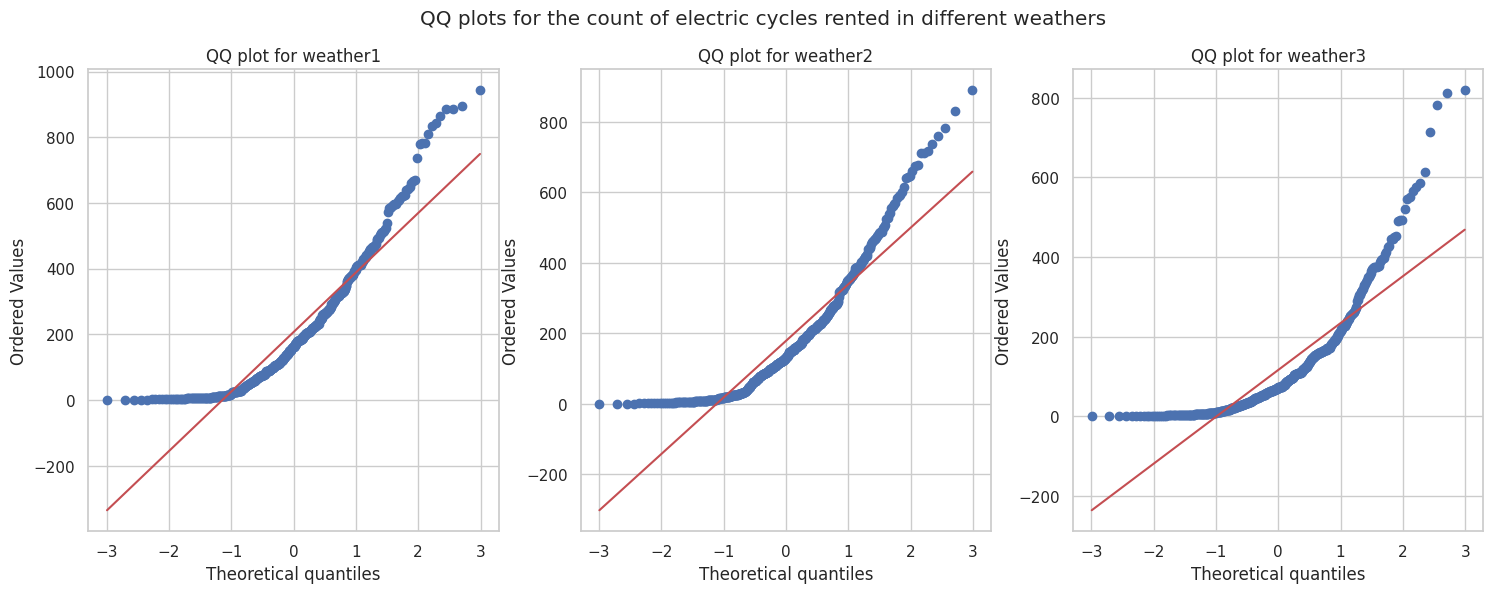

In [294]:
plt.figure(figsize = (18, 6))
plt.subplot(1, 3, 1)
plt.suptitle('QQ plots for the count of electric cycles rented in different weathers')
spy.probplot(df_weather1.loc[:, 'count'].sample(500), plot = plt, dist = 'norm')
plt.title('QQ plot for weather1')
plt.subplot(1, 3, 2)
spy.probplot(df_weather2.loc[:, 'count'].sample(500), plot = plt, dist = 'norm')
plt.title('QQ plot for weather2')
plt.subplot(1, 3, 3)
spy.probplot(df_weather3.loc[:, 'count'].sample(500), plot = plt, dist = 'norm')
plt.title('QQ plot for weather3')
plt.plot()

from the above plot we can say that the distributions do not follow normal distribution.

Applying Shapiro-Wilk test for normality

Ho: The sample follows normal distribution

Ha: The sample does not follow normal distribution

Alpha = 0.05


In [295]:
test_stat, p_value = spy.shapiro(df_weather1.loc[:, 'count'].sample(500)) #weather-1
print('p-value', p_value)
if p_value < 0.05:
    print('The sample does not follow normal distribution')
else:
    print('The sample follows normal distribution')

p-value 8.50238582320673e-19
The sample does not follow normal distribution


In [240]:
test_stat, p_value = spy.shapiro(df_weather2.loc[:, 'count'].sample(500)) #weather-2
print('p-value', p_value)
if p_value < 0.05:
    print('The sample does not follow normal distribution')
else:
    print('The sample follows normal distribution')

p-value 1.6130916333821363e-18
The sample does not follow normal distribution


In [241]:
test_stat, p_value = spy.shapiro(df_weather3.loc[:, 'count'].sample(500)) #weather-3
print('p-value', p_value)
if p_value < 0.05:
    print('The sample does not follow normal distribution')
else:
    print('The sample follows normal distribution')

p-value 2.5429566836680963e-27
The sample does not follow normal distribution


Homogeneity of Variances using Levene's test
* (Ho) - Homogenous Variance
* (Ha) - Non Homogenous Variance

In [242]:
test_stat, p_value = spy.levene(df_weather1.loc[:, 'count'].sample(500),
                                df_weather2.loc[:, 'count'].sample(500),
                                df_weather3.loc[:, 'count'].sample(500))
print('p-value', p_value)
if p_value < 0.05:
    print('The samples do not have Homogenous Variance')
else:
    print('The samples have Homogenous Variance ')

p-value 2.445146765480774e-13
The samples do not have Homogenous Variance


Since the samples are not normally distributed and do not have the same variance, f_oneway test cannot be performed here, we can perform its non parametric equivalent test.

Applying Kruskal-Wallis H-test for independent samples.

* Ho : Mean no. of cycles rented is same for different weather
* Ha : Mean no. of cycles rented is different for different weather

Alpha = 0.05

In [243]:
from scipy.stats import kruskal

stat, p_val = kruskal(df_weather1, df_weather2, df_weather3)
print('Test Statistic =', stat)
print('p value =', p_val)
alpha = 0.05
if p_val.all() < alpha:
    print('Reject Null Hypothesis')
else:
    print('Failed to reject Null Hypothesis')

Test Statistic = [1.36471292e+01 1.83091584e+00 5.37649760e+00 1.56915686e+01
 1.08840000e+04 3.70017441e+01 4.14298489e+01 1.83168690e+03
 2.80380482e+01 2.84639685e+02 1.73745440e+02 2.04955668e+02]
p value = [1.08783632e-03 4.00333264e-01 6.79999165e-02 3.91398508e-04
 0.00000000e+00 9.22939752e-09 1.00837627e-09 0.00000000e+00
 8.15859150e-07 1.55338046e-62 1.86920588e-38 3.12206618e-45]
Reject Null Hypothesis


* P-value is less than 0.05, As the P-value is less than the predetermined level of significance (alpha), We have the sufficient evidence to say that the average number of rental bikes is statistically different for different weathers.
* The hourly total number of rental bikes is statistically different for different weathers.

##Check if the demand of bicycles on rent is the same for different Seasons

In [244]:
df.groupby(by = 'season')['count'].describe()

count        mean         std  min   25%    50%    75%    max
season                                                                
1       2686.0  116.343261  125.273974  1.0  24.0   78.0  164.0  801.0
2       2733.0  215.251372  192.007843  1.0  49.0  172.0  321.0  873.0
3       2733.0  234.417124  197.151001  1.0  68.0  195.0  347.0  977.0
4       2734.0  198.988296  177.622409  1.0  51.0  161.0  294.0  948.0

In [245]:
df_season_spring = df.loc[df['season'] == 1, 'count']
df_season_summer = df.loc[df['season'] == 2, 'count']
df_season_fall = df.loc[df['season'] == 3, 'count']
df_season_winter = df.loc[df['season'] == 4, 'count']
len(df_season_spring), len(df_season_summer), len(df_season_fall), len(df_season_winter)

(2686, 2733, 2733, 2734)


Null Hypothesis ( H0 ) - Mean of cycle rented per hour is same for season 1,2,3 and 4.

Alternate Hypothesis ( HA ) -Mean of cycle rented per hour is different for season 1,2,3 and 4.

Significance level (alpha): 0.05

We will use One-way ANOVA to test this hypothesis


[]

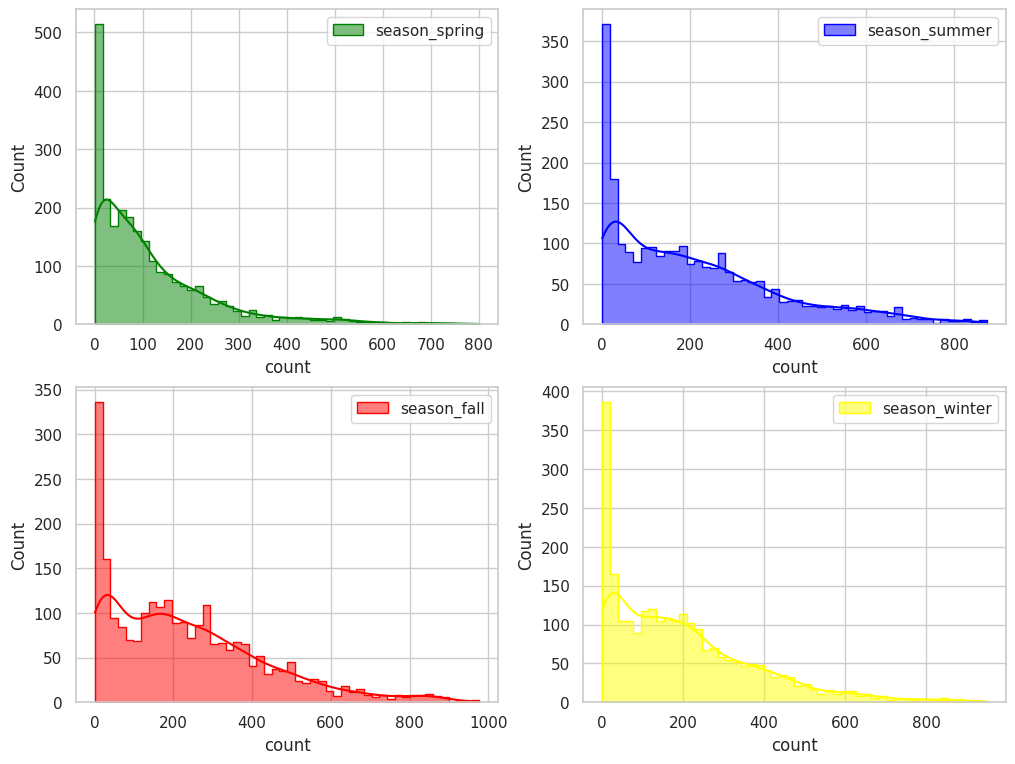

In [303]:
plt.figure(figsize = (12, 9)) #checking if the samples follow normal distribution using hist and kde plot
plt.subplot(2, 2, 1)
sns.histplot(df_season_spring.sample(2500), bins = 50,
             element = 'step', color = 'green', kde = True, label = 'season_spring')
plt.legend()
plt.subplot(2, 2, 2)
sns.histplot(df_season_summer.sample(2500), bins = 50,
             element = 'step', color = 'blue', kde = True, label = 'season_summer')
plt.legend()
plt.subplot(2, 2, 3)
sns.histplot(df_season_fall.sample(2500), bins = 50,
             element = 'step', color = 'red', kde = True, label = 'season_fall')
plt.legend()
plt.subplot(2, 2, 4)
sns.histplot(df_season_winter.sample(2500), bins = 50,
             element = 'step', color = 'yellow', kde = True, label = 'season_winter')
plt.legend()
plt.plot()

Normality check using QQ Plot. If the distribution is not normal, we will apply Shapiro-Wilk test for normality.

[]

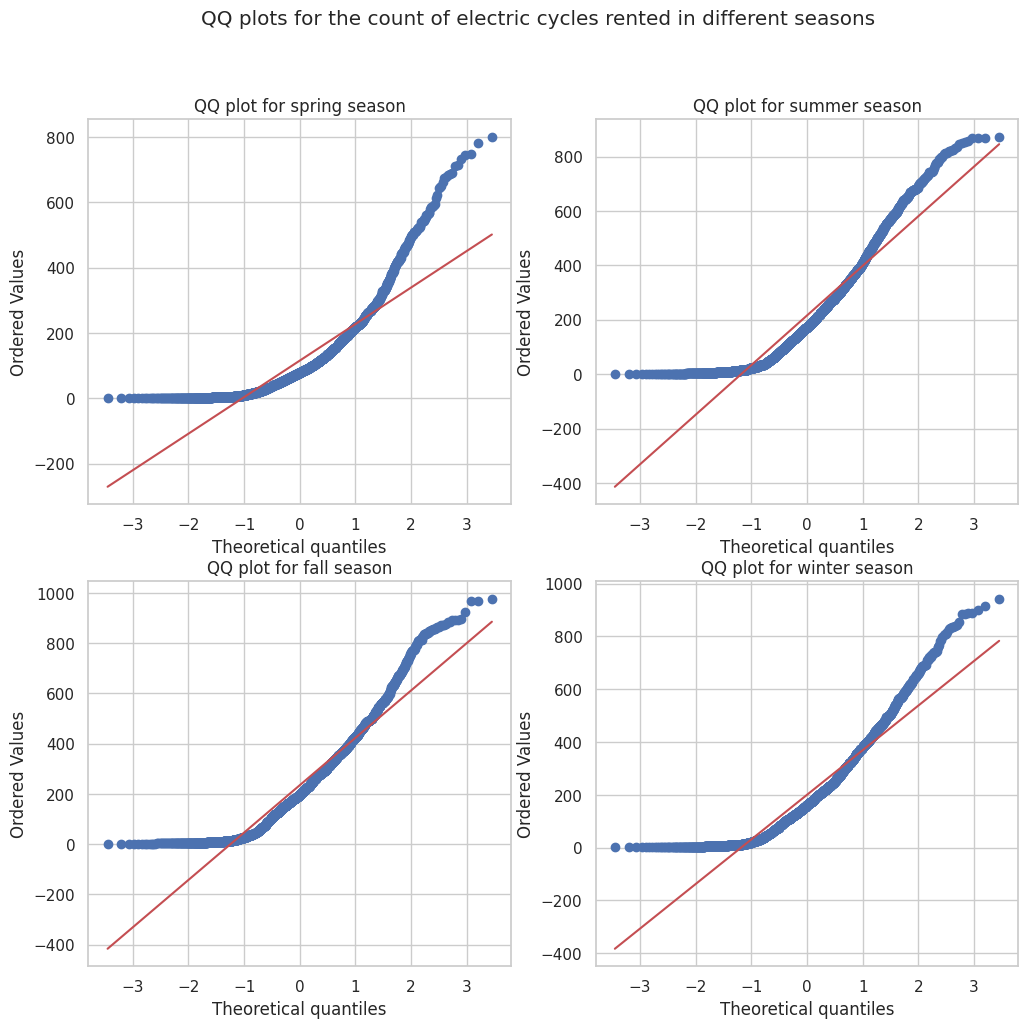

In [305]:
plt.figure(figsize = (12,11))
plt.subplot(2, 2, 1)
plt.suptitle('QQ plots for the count of electric cycles rented in different seasons')
spy.probplot(df_season_spring.sample(2500), plot = plt, dist = 'norm')
plt.title('QQ plot for spring season')

plt.subplot(2, 2, 2)
spy.probplot(df_season_summer.sample(2500), plot = plt, dist = 'norm')
plt.title('QQ plot for summer season')

plt.subplot(2, 2, 3)
spy.probplot(df_season_fall.sample(2500), plot = plt, dist = 'norm')
plt.title('QQ plot for fall season')

plt.subplot(2, 2, 4)
spy.probplot(df_season_winter.sample(2500), plot = plt, dist = 'norm')
plt.title('QQ plot for winter season')
plt.plot()

from the above plot we can say that the distributions do not follow normal distribution.

Applying Shapiro-Wilk test for normality

Ho: The sample follows normal distribution

Ha: The sample does not follow normal distribution

Alpha = 0.05

In [248]:
from scipy.stats import shapiro #spring
stat, p_val = shapiro(df_season_spring.sample(2500))
print('p-value', p_val)
if p_value < 0.05:
    print('The sample does not follow normal distribution')
else:
    print('The sample follows normal distribution')

p-value 0.0
The sample does not follow normal distribution


In [249]:
stat, p_val = shapiro(df_season_summer.sample(2500)) #summer
print('p-value', p_val)
if p_value < 0.05:
    print('The sample does not follow normal distribution')
else:
    print('The sample follows normal distribution')

p-value 3.4752089811378317e-37
The sample does not follow normal distribution


In [250]:
stat, p_val = shapiro(df_season_fall.sample(2500)) #fall
print('p-value', p_val)
if p_value < 0.05:
    print('The sample does not follow normal distribution')
else:
    print('The sample follows normal distribution')

p-value 2.1519158921721582e-35
The sample does not follow normal distribution


In [251]:
stat, p_val = shapiro(df_season_winter.sample(2500)) #winter
print('p-value', p_val)
if p_value < 0.05:
    print('The sample does not follow normal distribution')
else:
    print('The sample follows normal distribution')

p-value 5.575758742277047e-38
The sample does not follow normal distribution


Homogeneity of Variances using Levene's test
* (Ho) - Homogenous Variance
* (Ha) - Non Homogenous Variance

In [307]:
test_stat, p_value = spy.levene(df_season_spring.sample(2500),
                                df_season_summer.sample(2500),
                                df_season_fall.sample(2500),
                                df_season_winter.sample(2500))
print('p-value', p_value)
if p_value < 0.05:
    print('The samples do not have Homogenous Variance')
else:
    print('The samples have Homogenous Variance ')

p-value 1.6144901344317356e-109
The samples do not have Homogenous Variance


Since the samples are not normally distributed and do not have the same variance, f_oneway test cannot be performed here, we can perform its non parametric equivalent test.

Applying Kruskal-Wallis H-test for independent samples.

* Ho : Mean no. of cycles rented is same for different seasons
* Ha : Mean no. of cycles rented is different for different seasons

Alpha = 0.05


In [309]:
alpha = 0.05
test_stat, p_value = spy.kruskal(df_season_spring, df_season_summer, df_season_fall,df_season_winter)
print('Test Statistic =', test_stat)
print('p value =', p_value)
if p_value < alpha:
    print('Reject the null hypothesis')
else:
    print('Accept the null hypothesis')

Test Statistic = 699.6668548181988
p value = 2.479008372608633e-151
Reject the null hypothesis


* As the P-value is lesser than the predetermined level of significance (alpha), We have the sufficient evidence to say that the average number of rental bikes is statistically different for different seasons.
* The hourly total number of rental bikes is statistically different for different seasons.


## Check if the Weather conditions are significantly different during different Seasons

In [323]:
df['weather']

0        1
1        1
2        1
3        1
4        1
        ..
10881    1
10882    1
10883    1
10884    1
10885    1
Name: weather, Length: 10886, dtype: int64

In [324]:
data_table = pd.crosstab(df['season'], df['weather'])
print("Observed values:")
data_table

Observed values:


weather     1    2    3  4
season                    
1        1759  715  211  1
2        1801  708  224  0
3        1930  604  199  0
4        1702  807  225  0

Null Hypothesis (H0): Weather is independent of the season

Alternate Hypothesis (H1): Weather is not independent of the season

Significance level (alpha): 0.05

We will use chi-square test to test hypyothesis defined above.

In [325]:
from scipy.stats import chi2_contingency
chi_stats,p_val,df,exp_frequecy = chi2_contingency(data_table)
print("chi-square test statistic: ",chi_stats)
print("P_value:" ,p_val)
print("degrees of freedom: ",df)
if p_val< alpha:
  print("Weather conditions are significantly different during different Seasons")
else:
  print("Weather conditions are same during different Seasons")

chi-square test statistic:  49.158655596893624
P_value: 1.549925073686492e-07
degrees of freedom:  9
Weather conditions are significantly different during different Seasons


Since p-value is less than the alpha 0.05, We reject the Null Hypothesis. Meaning that Weather conditions are significantly different during different Seasons.
* There is statistically significant dependency of weather 1, 2, 3 on season based on the average hourly total number of bikes rented.

### Insights

**Temperature and Bike Counts:**
* The temperature columns, feeling temperature and temperature, as well as the bike count columns, count and registered, show a strong connection. This means they are closely related to each other.

**Other Column Combinations:**
* For all other pairs of columns, the connection or correlation is very weak. This suggests that those variables are not significantly linked to each other.

**No Strong Linear Relationships:**
* None of the column pairs have a high positive or negative correlation (between 0.7 and 0.9). This indicates there are no strong linear relationships between any two columns in the dataset.

**Bike Counts on Working and Non-Working Days:**
* On average, the number of rental bikes per hour is similar on both working and non-working days.

**Bike Counts in Different Weathers:**
* The total number of rental bikes per hour varies significantly with different weather conditions.

**Bike Counts in Different Seasons:**
* The total number of rental bikes per hour also varies significantly across different seasons.

**Weather and Seasonal Dependency:**
* The average hourly bike rental numbers show a statistically significant relationship between weather conditions (1, 2, 3) and seasons.


## Recommendations

**Strategic Promotions:**
* Implement weather-based promotions
* offering discounts during clear and cloudy days when bike rentals are highest, attracting more customers to Yulu.

**Flexible Pricing and Inventory:**
* Introduce time-based pricing to balance demand, with lower rates during off-peak hours.
* Optimize inventory based on seasonal demand, ensuring ample bikes during summer and fall and adjusting during low-demand months.

**Customer-Centric Approach:**
* Encourage customer feedback to enhance services and tailor offerings to meet customer expectations.
* Leverage social media for marketing, showcasing biking experiences, engaging with customers.
* Running targeted campaigns for increased bookings.
